In [59]:
import keras
from keras.datasets import mnist # imporint the data set

In [28]:
im_row , im_col = 28, 28 # size of image 28*28
(train_img , train_labels),(test_img , test_labels) = mnist.load_data() # downloading data and split it to train and test

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [29]:
print(train_img.shape,train_labels.shape)

(60000, 28, 28) (60000,)


In [30]:
print(test_img.shape,test_labels.shape)


(10000, 28, 28) (10000,)


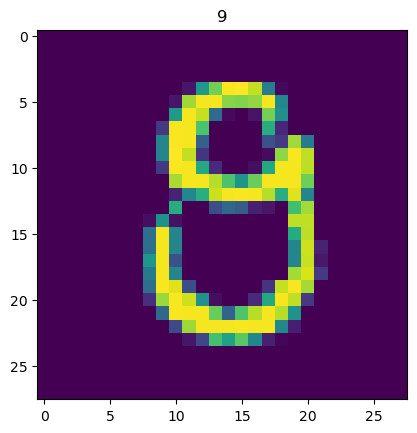

In [31]:
import matplotlib.pyplot as plt

n = 80 # index number of what we want to see

plt.title(train_labels[n])
plt.imshow(train_img[n])
plt.show()

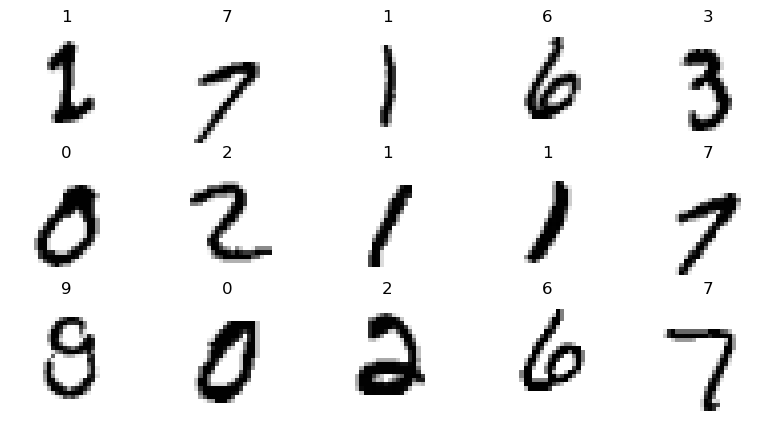

In [32]:
plt.figure(figsize=(10, 5)) 
for i in range(70,85):
    plt.subplot(3,5,i-70+1)
    plt.imshow(train_img[i],cmap ='binary')
    plt.title(train_labels[i])
    #plt.tight_layout() #cause a strange prob
    plt.axis('off')
    

In [33]:
train_img = train_img.reshape(train_img.shape[0],im_row,im_col,1)
test_img = test_img.reshape(test_img.shape[0],im_row,im_col,1)
input_shape = (im_row,im_col,1)
train_img = train_img/255.0
test_img = test_img/255.0

In [34]:
print(train_img.shape , test_img.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [35]:
train_labels = keras.utils.to_categorical(train_labels,10) # 10 because we have 10 numbers so we need 10 classes
test_labels = keras.utils.to_categorical(test_labels, 10)
print(train_labels.shape , test_labels.shape)

(60000, 10) (10000, 10)


In [36]:
from keras.models import Sequential
from keras.layers  import Conv2D ,MaxPool2D
from keras.layers  import Flatten ,Dense
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform', input_shape=(28, 28, 1))) 
model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model.add(Conv2D(128,kernel_size =(3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │     1,548,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,642,582 (6.27 MB)

 Trainable params: 1,642,582 (6.27 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_img, train_labels,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(test_img, test_labels))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - accuracy: 0.8716 - loss: 0.4379 - val_accuracy: 0.9832 - val_loss: 0.0517
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.9849 - loss: 0.0506 - val_accuracy: 0.9854 - val_loss: 0.0424
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - accuracy: 0.9897 - loss: 0.0325 - val_accuracy: 0.9881 - val_loss: 0.0333
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9928 - loss: 0.0229 - val_accuracy: 0.9906 - val_loss: 0.0288
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - accuracy: 0.9947 - loss: 0.0178 - val_accuracy: 0.9895 - val_loss: 0.0345
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9963 - loss: 0.0119 - val_accuracy: 0.9893 - val_loss: 0.0317
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - accuracy: 0.9973 - loss: 0.0099 - val_accuracy: 0.9895 - val_loss: 0.0358
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9976 - loss: 0.0074 - 

In [38]:
score = model.evaluate(test_img,test_labels,verbose=0)
score

[0.03911861404776573, 0.9909999966621399]

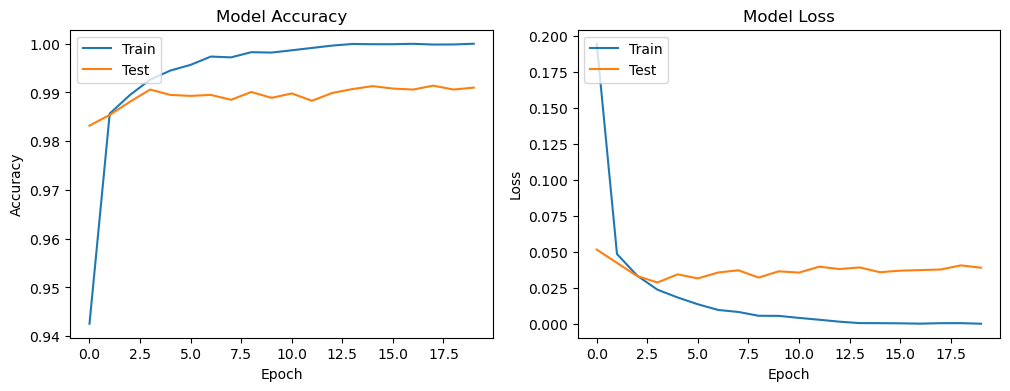

In [39]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
4


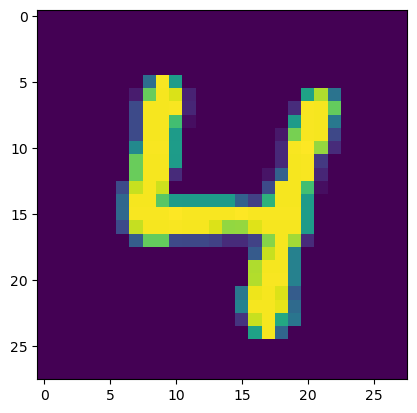

In [40]:
import numpy as np
num = 56

predict = model.predict(test_img) # returns an array of class probabilities for each image in test_imgs
pre = np.argmax(predict[num])
print(pre)
plt.figure()
plt.imshow(test_img[num])

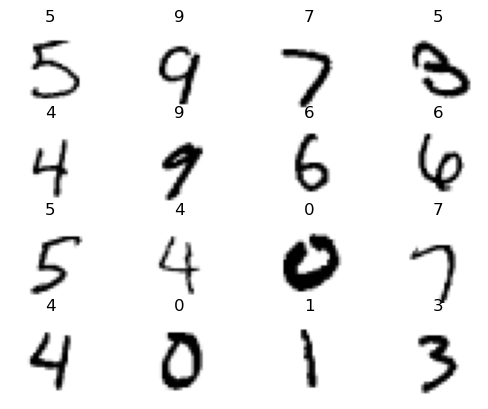

In [41]:
c= 15
for i in range(c,c+16):
  plt.subplot(4,4,i-c+1)
  plt.imshow(test_img[i],cmap = plt.cm.binary)
  plt.axis('off')
  plt.title(np.argmax(predict[i]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


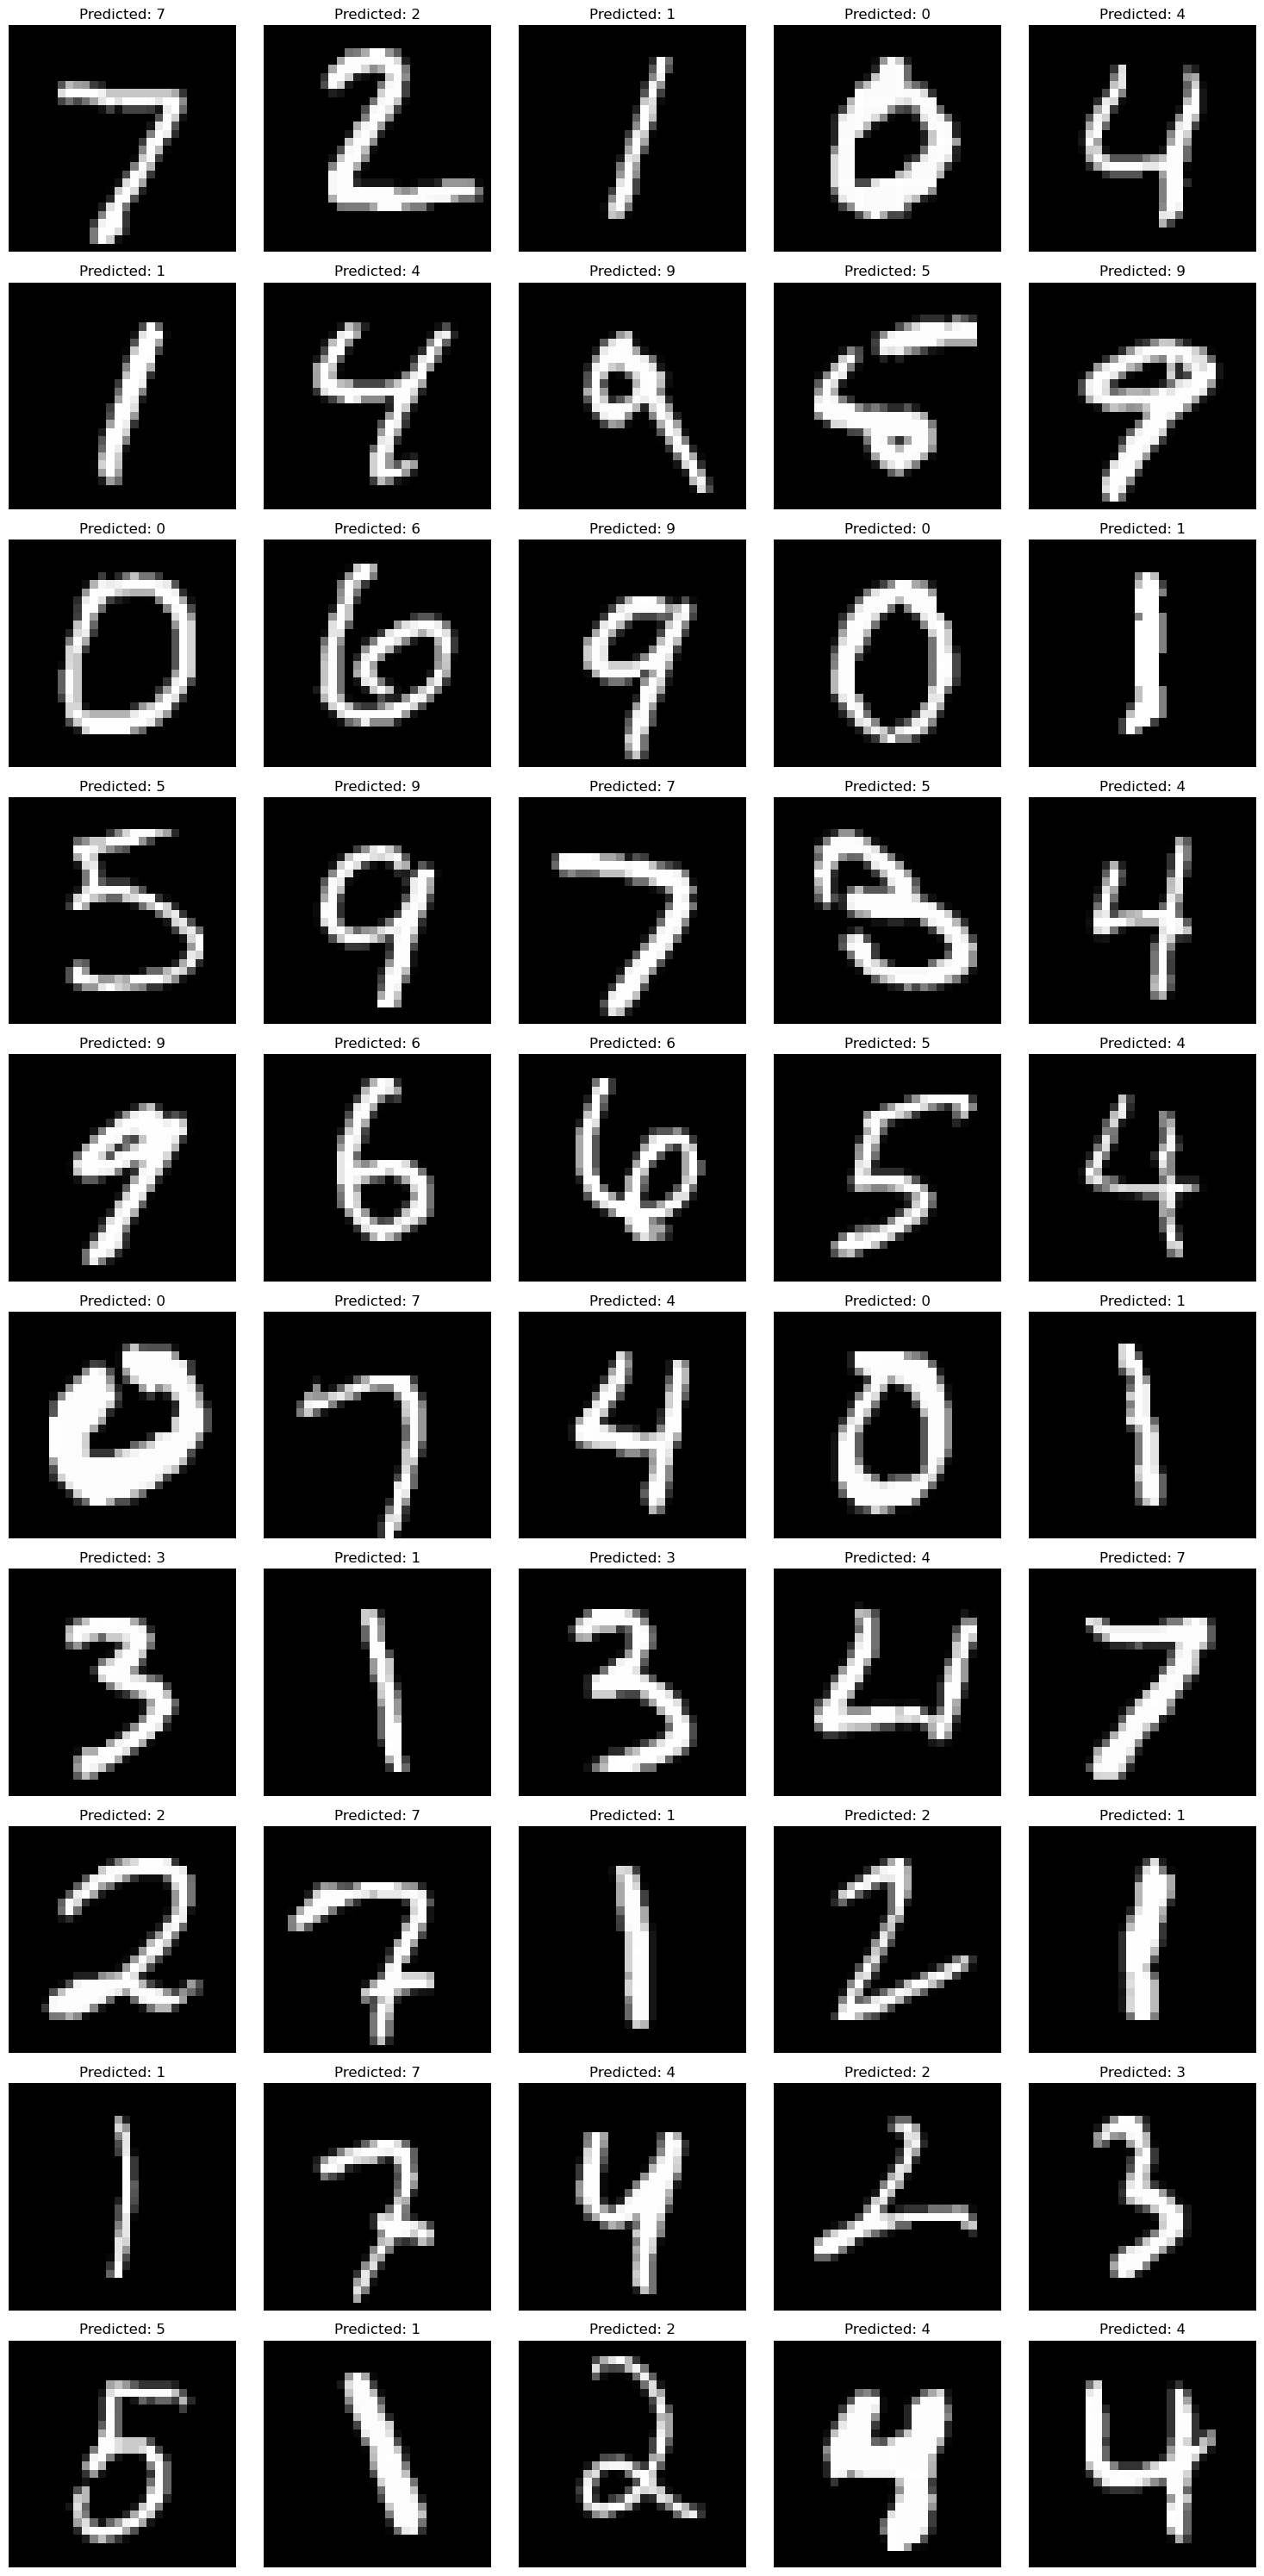

In [42]:
predictions = model.predict(test_img)

num_images = 50
images_per_row = 5
num_rows = (num_images + images_per_row - 1) // images_per_row

plt.figure(figsize=(images_per_row * 3, num_rows * 3))

for i in range(num_images):
    predicted_class = np.argmax(predictions[i])
    plt.subplot(num_rows, images_per_row, i + 1)
    plt.imshow(test_img[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [61]:
predictions = model.predict(test_img)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
